In [1]:
import pandas as pd
import numpy as np
agr=pd.read_excel('train_agr.xlsx')

In [2]:
agr.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


### Observation:
    * ID is unique each row will have one unique number we can drop this row
    * Estimated_Insects_Count is count of insects per square meter
    * Crop_Type is 0 and 1
    * Soil_Type is 0 and 1
    * Pesticide_Use_Category is type of pesticide used 1 means Never Used, 2 means Previously Used,3 means Currently Using
    * Number_Doses_Week - no. of doses per week
    * Number_Weeks_Used - no .of weeks used
    * Number_Weeks_Quit - no. of weeks quit
    * Season means season category i.e.,1,2,3
    * Crop_Damage means crop damage category 0 means alive,1 means Damage due to other causes,2 means damage due to Pesticides

In [3]:
agr.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

#### Observation:
    * ID is object
    * Number_weeks_quit is float
    * Remaining are int type

In [4]:
# Checking unique values 
for column in agr.columns:
    print(f"{column}: Number of unique values {agr[column].nunique()}")
    print('------------------------------------------------------------')

ID: Number of unique values 4599
------------------------------------------------------------
Estimated_Insects_Count: Number of unique values 71
------------------------------------------------------------
Crop_Type: Number of unique values 2
------------------------------------------------------------
Soil_Type: Number of unique values 2
------------------------------------------------------------
Pesticide_Use_Category: Number of unique values 3
------------------------------------------------------------
Number_Doses_Week: Number of unique values 20
------------------------------------------------------------
Number_Weeks_Used: Number of unique values 63
------------------------------------------------------------
Number_Weeks_Quit: Number of unique values 47
------------------------------------------------------------
Season: Number of unique values 3
------------------------------------------------------------
Crop_Damage: Number of unique values 3
-------------------------------

In [5]:
agr.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


#### Observation:
    * There is some huge gap between mean and std in columns like Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used .
    * There is some huge gap between 75% and max value Estimated_Insects_Count,Number_Doses_Week, Number_Weeks_Used,Number_Weeks_Quit
    * Minimum Eastimated_Insects_Cont is 150 and Maximum is 4097
    

In [6]:
agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
agr.shape

(4599, 10)

## Checking for missing values

In [8]:
agr.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

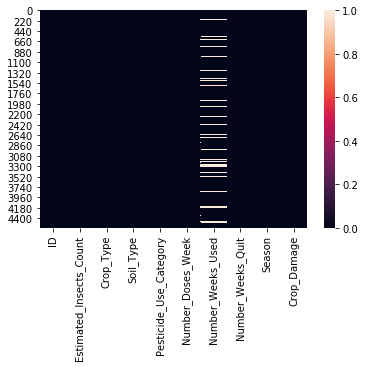

In [9]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(agr.isnull())
plt.show()

#### Observaion:
    There are null values in column Number_Weeks_Used

In [10]:
# Let us replace null values with mean
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
agr['Number_Weeks_Used']=imp.fit_transform(agr['Number_Weeks_Used'].values.reshape(-1,1))

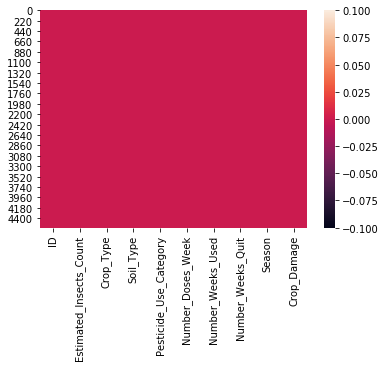

In [11]:
#again using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(agr.isnull())
plt.show()

#### Observation:
    *There ar no null values.

## To Check  the Correlation

In [12]:
agr1=agr.corr()
agr1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


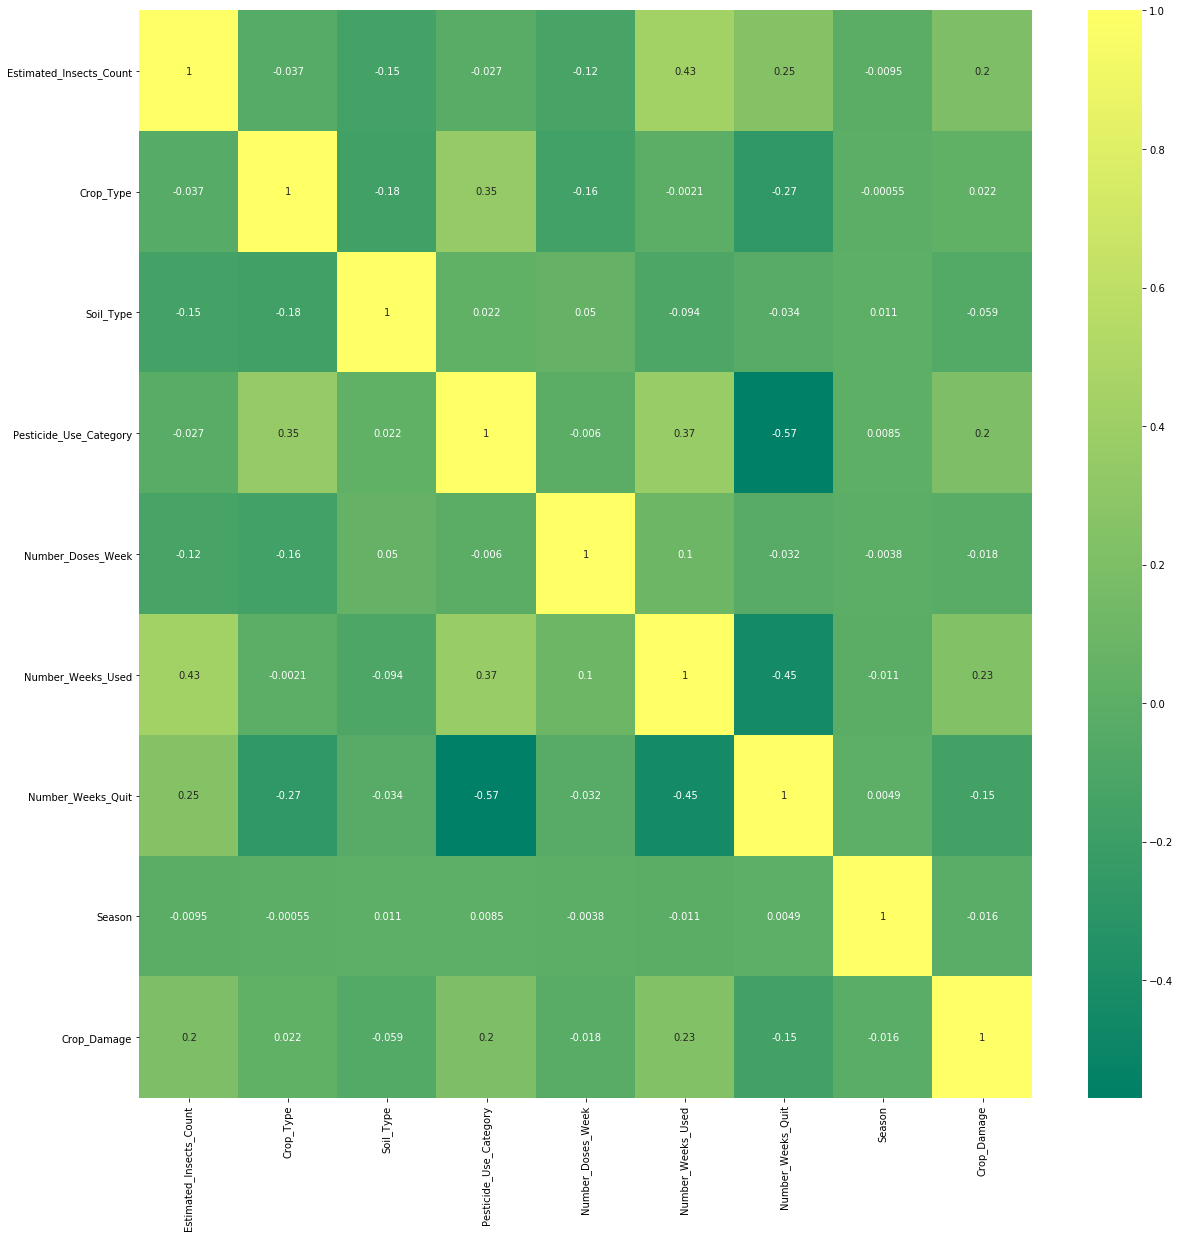

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(agr1,annot=True,cmap='summer')

#### Observation:
    The data is nomarlly correlated.

## Data Visualization

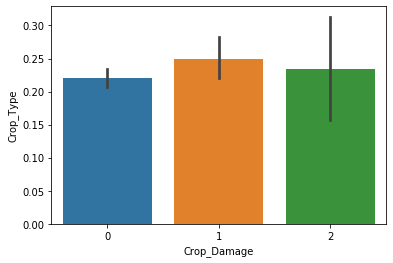

In [14]:
sns.barplot(x='Crop_Damage',y='Crop_Type',data=agr)
plt.show()

### Observation:
    Damaged due other reasons crops are more in Crop_Type 

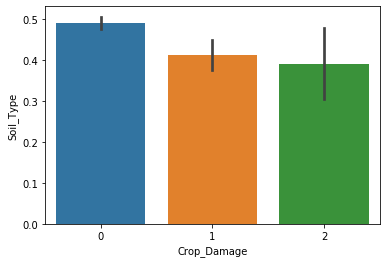

In [15]:
sns.barplot(x='Crop_Damage',y='Soil_Type',data=agr)
plt.show()

##### Observation:
    Alive type  crops are more in Soil_Type

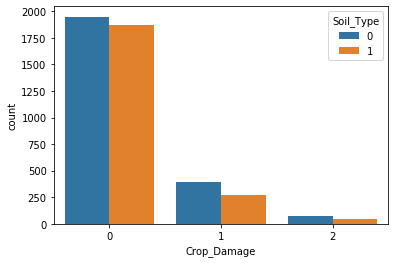

In [16]:
sns.countplot(x='Crop_Damage',hue='Soil_Type',data=agr)
plt.show()

##### observation:
    Alive type crop count is more in Soil_Type

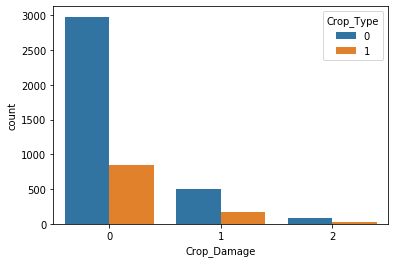

In [17]:
sns.countplot(x='Crop_Damage',hue='Crop_Type',data=agr)
plt.show()

##### Observation:
    Alive count is more in Crop_Type

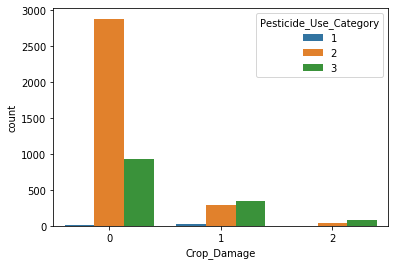

In [18]:
sns.countplot(x='Crop_Damage',hue='Pesticide_Use_Category',data=agr)
plt.show()

##### Observation:
    Pesticide category 2 count is more in alive state.

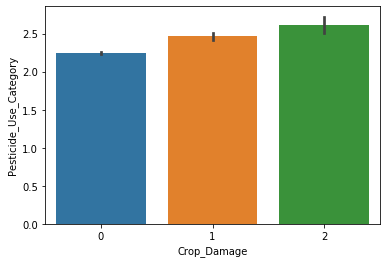

In [19]:
sns.barplot(x='Crop_Damage',y='Pesticide_Use_Category',data=agr)
plt.show()

##### Observation:
    Pesticide used crop is damaged more i.e.,2

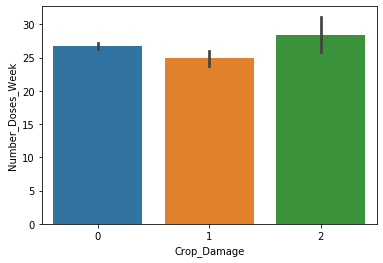

In [20]:
sns.barplot(x='Crop_Damage',y='Number_Doses_Week',data=agr)
plt.show()

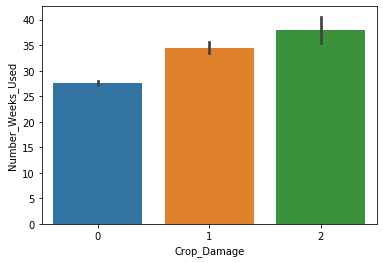

In [21]:
sns.barplot(x='Crop_Damage',y='Number_Weeks_Used',data=agr)
plt.show()

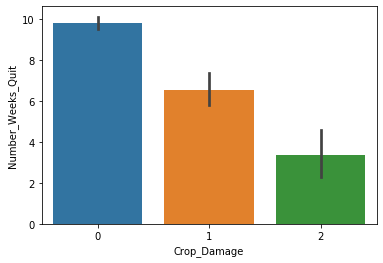

In [22]:
sns.barplot(x='Crop_Damage',y='Number_Weeks_Quit',data=agr)
plt.show()

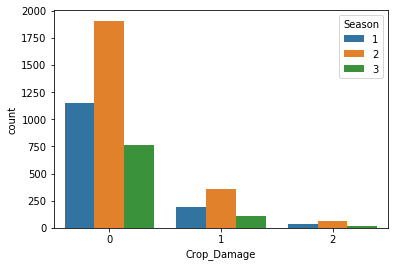

In [23]:
sns.countplot(x='Crop_Damage',hue='Season',data=agr)
plt.show()

## To Check the Distribution of Skewness

In [24]:
agr.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

##### Observation:
    Data is Positively skewed .We have to reduce skewness

In [25]:
agr1=pd.DataFrame(agr['Crop_Damage'])

In [26]:
#our target variable should not be affected so seprating target before reducing skewness and  ID column is unique it can be droped
agr=agr.drop(['Crop_Damage','ID'],axis=1)

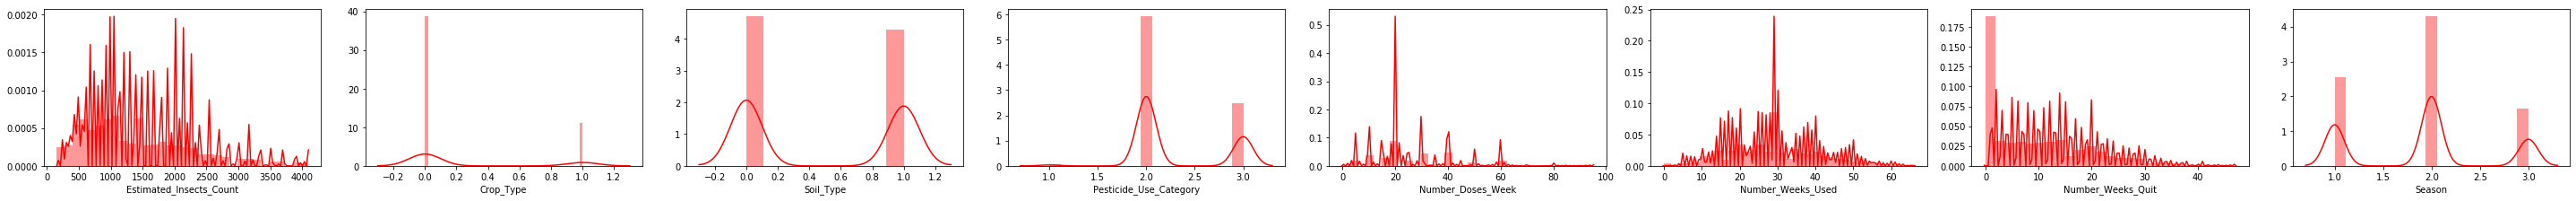

In [27]:
collist=agr.columns.values
ncol=10
nrow=10
plt.figure(figsize=(50,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(agr[collist[i]],color='red',kde_kws={'bw':0.1})
    plt.tight_layout()

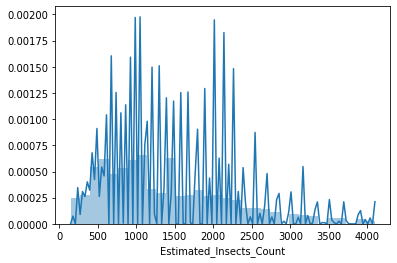

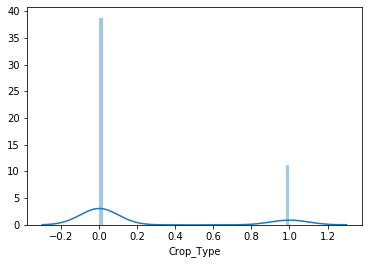

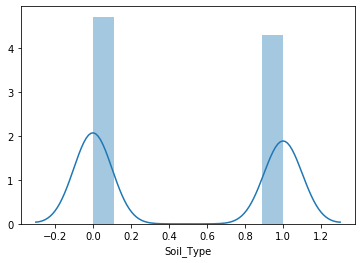

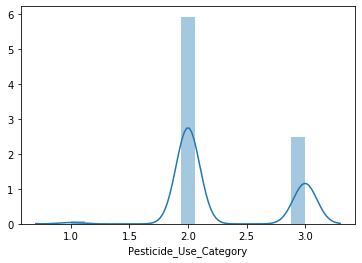

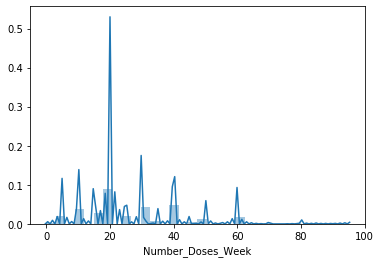

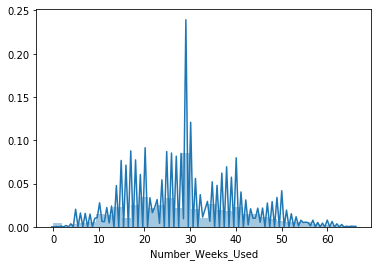

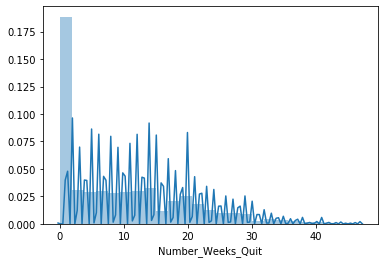

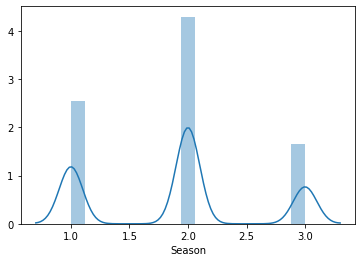

In [28]:
collist=agr.columns.values
ncol=10
nrow=10
for i in agr.columns:
    sns.distplot(agr[i],kde_kws={'bw':0.1})
    plt.show()

##### Observation:
    From displot we can observe our data is positively skewed

In [29]:
#Treating skewness via log method
for col in agr.columns:
    if agr[col].skew()>0.55:
        agr[col]=np.log1p(agr[col])

In [30]:
agr.skew()

Estimated_Insects_Count   -0.498606
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.416624
Number_Doses_Week         -1.196764
Number_Weeks_Used          0.278664
Number_Weeks_Quit         -0.199671
Season                     0.144841
dtype: float64

##### Observation:
    Skewness is reduced

## checking for Outliers

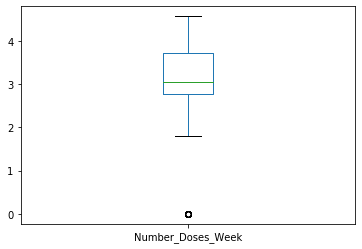

In [31]:
agr['Number_Doses_Week'].plot.box()

##### Observation:
    There are Outliers is Number_Doses_Week

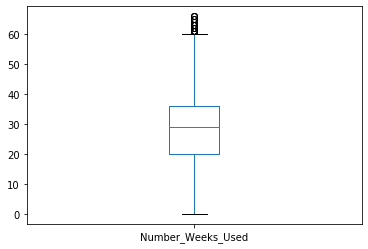

In [32]:
agr['Number_Weeks_Used'].plot.box()

In [33]:
#Concating target variable and data to remove outliers
agr=pd.concat([agr,agr1],axis=1)
agr.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,5.241747,0.693147,0,0.693147,0.0,0.0,0.0,1,0
1,5.347108,0.693147,0,0.693147,0.0,0.0,0.0,2,1
2,5.552960,0.693147,0,0.693147,0.0,0.0,0.0,2,1
3,5.552960,0.693147,1,0.693147,0.0,0.0,0.0,2,1
4,5.837730,0.693147,0,0.693147,0.0,0.0,0.0,2,1


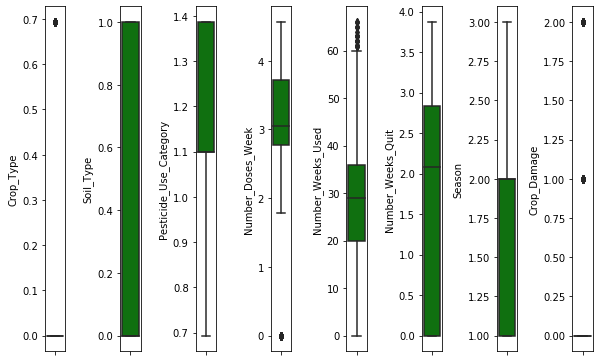

In [34]:
#let us check outliers for all columns
col=agr.columns.values
ncol=10
nrow=10
plt.figure(figsize=(ncol,5*ncol))
for i in  range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(agr[col[i]],color='green',orient='v')
    plt.tight_layout()

##### Observation:
    here are Outliers is Number_Weeks_Used,Number_Doses_Week

## Removing Outliers

In [35]:
#Removing outliers
from scipy.stats import zscore
z_score=abs(zscore(agr))
print(agr.shape)
train_agr=agr.loc[(z_score<3).all(axis=1)]
print(train_agr.shape)

(4599, 9)
(4414, 9)


##### Observation:
    185 rows are removed as outliers
    all outliers are removed

## Model Training

In [36]:
#Seprating into input and output variables
df_x=train_agr.drop(['Crop_Damage'],axis=1)

In [37]:
y=pd.DataFrame(train_agr['Crop_Damage'])

In [38]:
df_x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
27,5.129899,0.0,1,1.386294,3.044522,14.0,0.0,2
28,5.129899,0.0,1,1.386294,3.044522,15.0,0.0,2
29,5.241747,0.0,0,1.386294,3.258097,19.0,0.0,1
30,5.241747,0.0,1,1.386294,3.713572,24.0,0.0,3
31,5.347108,0.0,1,1.386294,3.044522,8.0,0.0,3


In [39]:
y.head()

,Crop_Damage
27,0
28,1
29,0
30,0
31,0


In [40]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)


In [41]:
x.shape

(4414, 8)

In [42]:
y.shape

(4414, 1)

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

## Finding The Best Parameters

In [44]:
from sklearn import svm
svc=svm.SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1.0]}
gd=GridSearchCV(svc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'C': 1.0, 'kernel': 'linear'}


In [45]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'criterion': 'entropy'}


In [46]:
model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='linear'),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=.20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Score:')
    print('accuracy_score :',accuracy_score(y_test,predm))
    print('confusion_matrix :',confusion_matrix(y_test,predm))
    print('classification_report',classification_report(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.9988671764372699
Score:
accuracy_score : 0.7904869762174406
confusion_matrix : [[658 109]
 [ 76  40]]
classification_report               precision    recall  f1-score   support

           0       0.90      0.86      0.88       767
           1       0.27      0.34      0.30       116

    accuracy                           0.79       883
   macro avg       0.58      0.60      0.59       883
weighted avg       0.81      0.79      0.80       883

*******************************************************************************************************


S

##### Observation:
    * score of DecisionTreeClassifier    = 99%  and accuracy score = 79%
    * score of KNeighborsClassifier      = 87%  and accuracy score = 85%         
    * Score of SVC                       = 85%  and accuracy score = 86%
    * Score of GaussianNB                = 82%  and accuracy score = 84%    
    * Score of RandomForestClassifier    = 99%  and accuracy socre = 86%
    * Score of AdaBoostClassifier        = 85%  and accuracy score = 86%
    * Score of GradientBoostingClassifier= 87%  and accuracy score = 87%
    * Score of BaggingClassifier         = 98%  and accuracy score = 84%
    * Score of ExtraTreesClassifier      = 99%  and accuracy score = 84%

Among all models GradientBoostingClassifier gives best result with 87% accuracy score 

In [47]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='linear'),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('*******************************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: [0.70328426 0.75651189 0.75424689 0.72480181 0.77664399]
Mean score: 0.7430977676083647
Standard deviation: 0.025882226207924616
*******************************************************************************************************


Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is: [0.78029445 0.8380521  0.81993205 0.82219706 0.8446712 ]
Mean score: 0.8210293706006373
Standard deviation: 0.022408081715234

##### Observation:
    Data is well trained and GradientBoostingClassifier is our best model 
    

In [48]:
#  GradientBoostingClassifier with best result
gbc= GradientBoostingClassifier(random_state=55)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8731596828992072
[[758   9]
 [103  13]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       767
           1       0.59      0.11      0.19       116

    accuracy                           0.87       883
   macro avg       0.74      0.55      0.56       883
weighted avg       0.84      0.87      0.83       883



##### Observation:
    GradientBoostingClassifier gives best results with accuracy score of 87%

Text(0.5, 1, 'Confusion_matrix of  DecisionTreeClassifier')

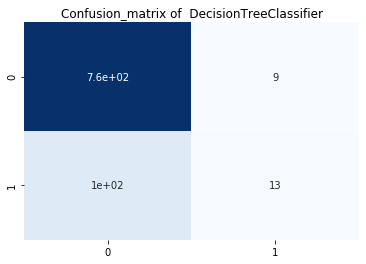

In [49]:
#plotting confusion matrix for GradientBoostingClassifier
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title("Confusion_matrix of  DecisionTreeClassifier")

## Saving the best model

In [50]:
import joblib
#save the best model to a pickel in a file
joblib.dump(dtc,'Tain_Agriculture.pkl')

['Tain_Agriculture.pkl']

## Now Let us predict test data using above model

In [51]:
import pandas as pd
import numpy as np
test_agr=pd.read_excel('test_agr.xlsx')

In [52]:
test_agr.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [53]:
test_agr.shape

(1199, 9)

In [54]:
# we already know that id is removed is train data so we are removing in test data also
test_agr=test_agr.drop(['ID'],axis=1)

In [55]:
#checking for null values
test_agr.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

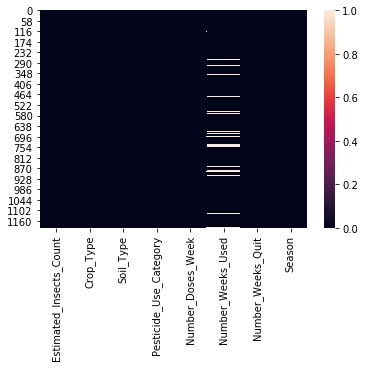

In [56]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(test_agr.isnull())
plt.show()

##### observation:
    There are null values in Number_Weeks_Used.

In [57]:
# Let us replace null values with mean
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
test_agr['Number_Weeks_Used']=imp.fit_transform(test_agr['Number_Weeks_Used'].values.reshape(-1,1))

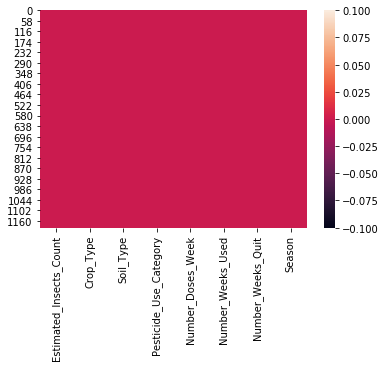

In [58]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(test_agr.isnull())
plt.show()

##### Observation:
    Null value are replaced with mean value

In [59]:
test_agr.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.130647,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,29.033333,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,36.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


##### Observation:
    * There is some huge gap between mean and std in columns like Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used .
    * There is some huge gap between 75% and max value Estimated_Insects_Count,Number_Doses_Week, Number_Weeks_Used,Number_Weeks_Quit
    * Minimum Eastimated_Insects_Cont is 150 and Maximum is 4097
    

In [60]:
test_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1199 non-null   int64  
 1   Crop_Type                1199 non-null   int64  
 2   Soil_Type                1199 non-null   int64  
 3   Pesticide_Use_Category   1199 non-null   int64  
 4   Number_Doses_Week        1199 non-null   int64  
 5   Number_Weeks_Used        1199 non-null   float64
 6   Number_Weeks_Quit        1199 non-null   int64  
 7   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.1 KB


In [61]:
test=test_agr.corr()


In [62]:
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.491944,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.062412,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.139741,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.406020,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.122996,0.009077,0.027197
Number_Weeks_Used,0.491944,0.062412,-0.139741,0.406020,0.122996,1.000000,-0.362582,0.018306
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.362582,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.018306,0.030281,1.000000


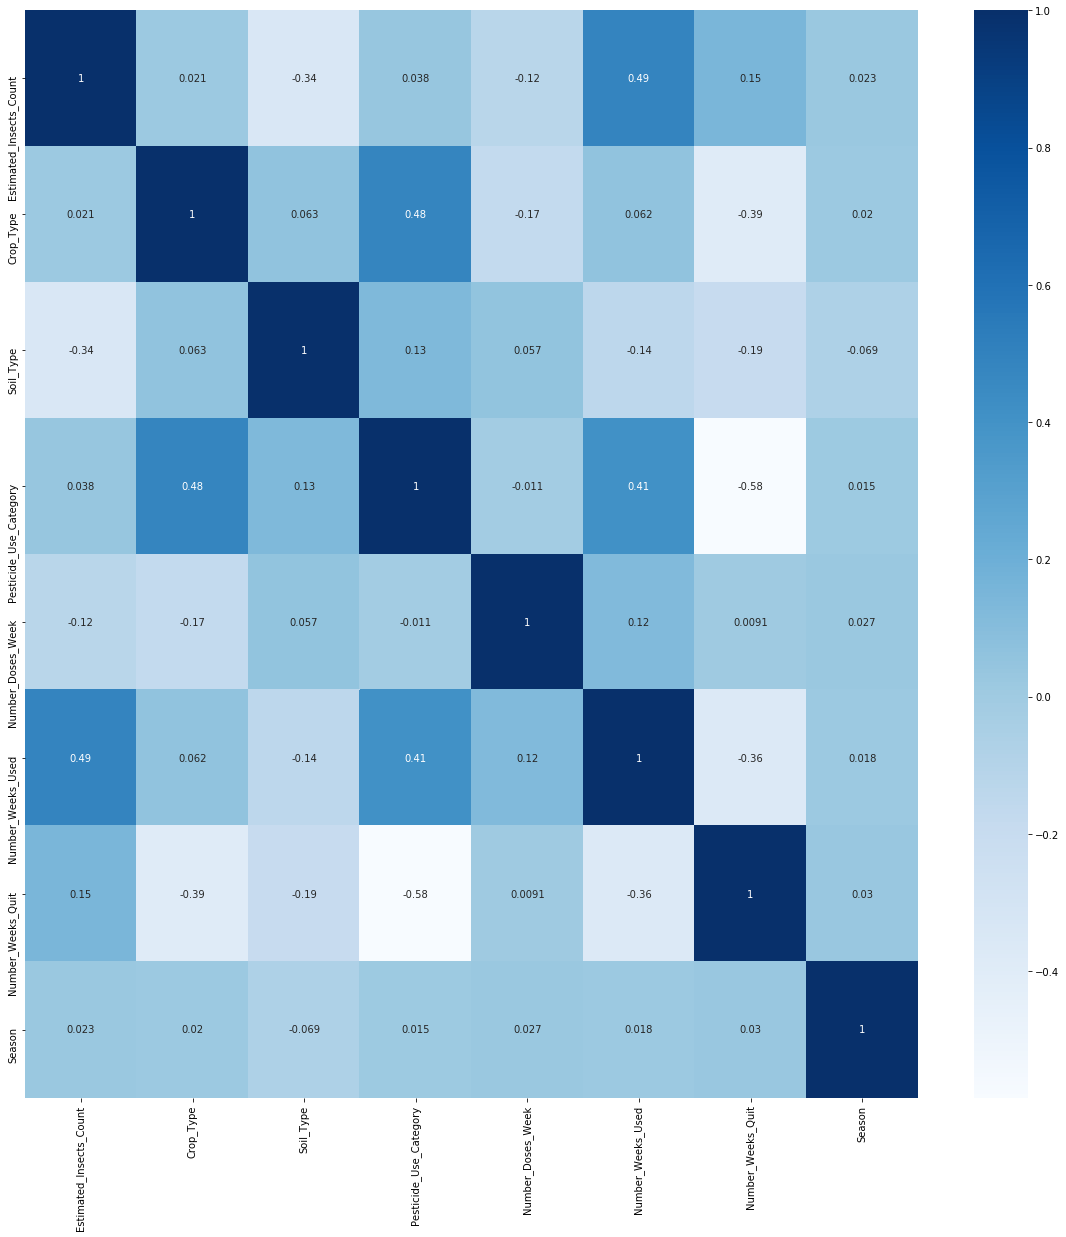

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(test,annot=True,cmap='Blues')

##### Observation:
     The data is nomarlly correlated.

## Checking Skewness

In [64]:
test_agr.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

##### Observation:
    Data is Positively skewed .We have to reduce skewness

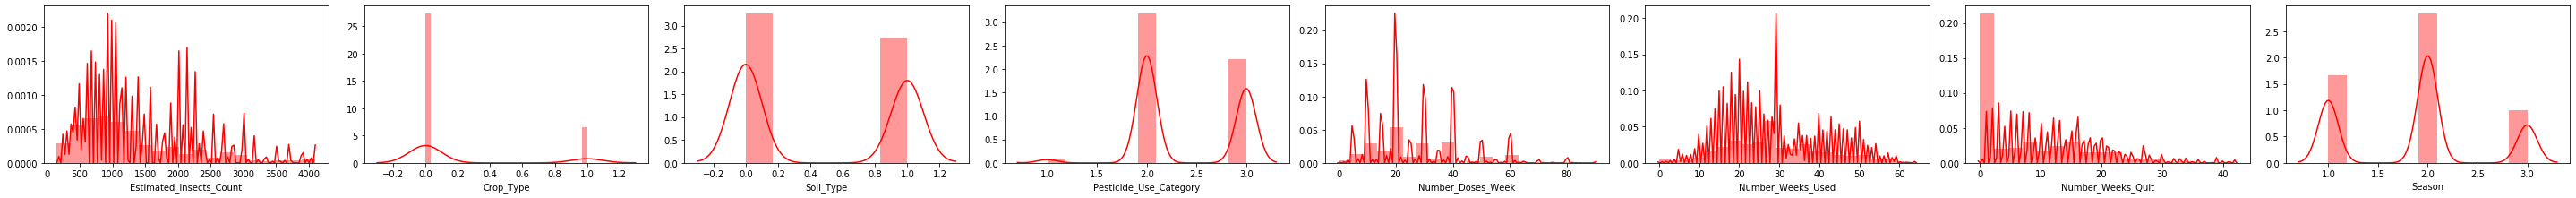

In [65]:
collist=test_agr.columns.values
ncol=10
nrow=10
plt.figure(figsize=(50,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(test_agr[collist[i]],color='red',kde_kws={'bw':0.1})
    plt.tight_layout()

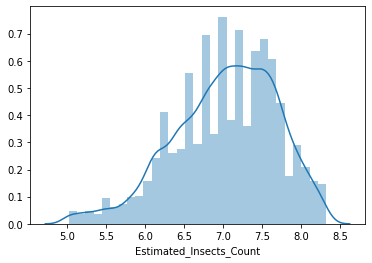

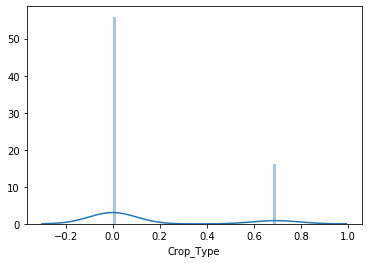

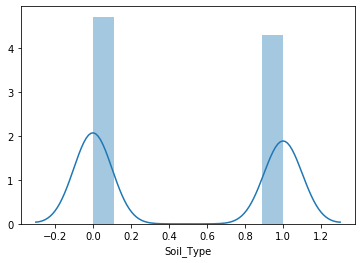

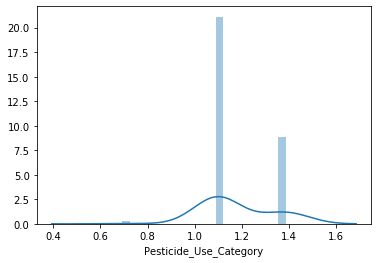

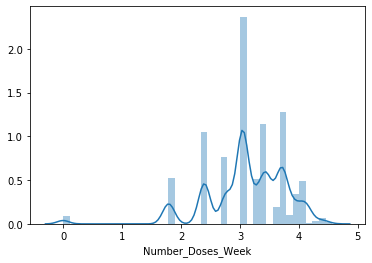

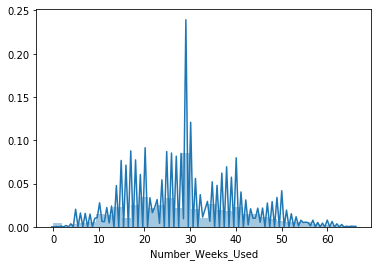

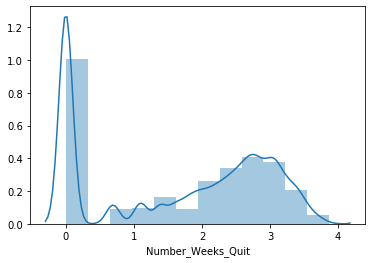

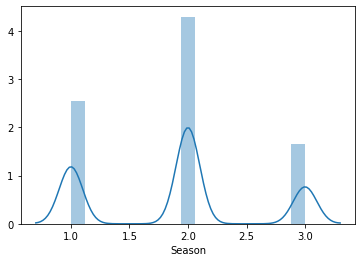

In [66]:
collist=test_agr.columns.values
ncol=10
nrow=10
for i in test_agr.columns:
    sns.distplot(agr[i],kde_kws={'bw':0.1})
    plt.show()

In [67]:
#Treating skewness via log method
for col in test_agr.columns:
    if test_agr[col].skew()>0.55:
        test_agr[col]=np.log1p(test_agr[col])

In [68]:
test_agr.skew()

Estimated_Insects_Count   -0.274855
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -1.427895
Number_Weeks_Used          0.220343
Number_Weeks_Quit          0.197853
Season                     0.155872
dtype: float64

##### Observation:
    Skewness is reduced

## Chceking for Outliers

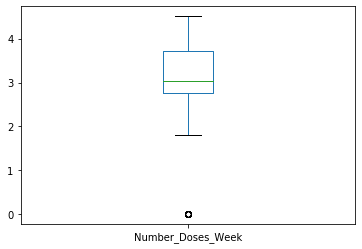

In [69]:
test_agr['Number_Doses_Week'].plot.box()

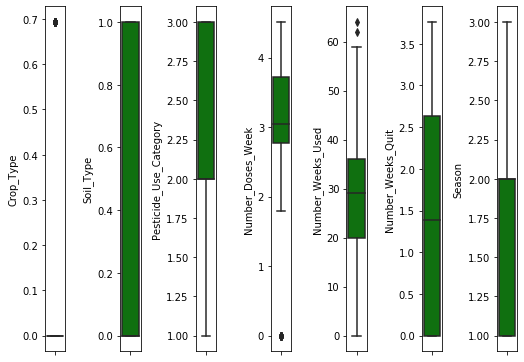

In [70]:
#let us check outliers for all columns
col=test_agr.columns.values
ncol=10
nrow=10
plt.figure(figsize=(ncol,5*ncol))
for i in  range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(test_agr[col[i]],color='green',orient='v')
    plt.tight_layout()

##### Observation:
    hence there are Outliers is Number_Weeks_Used,Number_Doses_Week

## Removing Outliers

In [71]:
#Removing outliers
from scipy.stats import zscore
z_score=abs(zscore(test_agr))
print(test_agr.shape)
test=test_agr.loc[(z_score<3).all(axis=1)]
print(test.shape)

(1199, 8)
(1177, 8)


##### Observation:
    22 rows are remmoved as Outliers

## Model fitting in above model

In [72]:
# Model which is selected as a best model is GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=55)
gbc=gbc.fit(x_train,y_train)
#Predicting test data 
pred=gbc.predict(test)
new_pred=gbc.predict(test)

In [73]:
x.shape

(4414, 8)

In [74]:
new_pred.shape

(1177,)

In [75]:
agrresult=pd.DataFrame(new_pred)

In [76]:
#Saving test data to csv file as agrresult
agrresult.to_csv('agrresult.csv')

In [77]:
agrresult

,0
0,0
1,0
2,0
3,0
4,0
...,...
1172,1
1173,1
1174,1
1175,1


#### Observation:
    Hence we have predicted test data using train test. And we have save Best model in pickel file and our test Outputs in csv file